# About
- **By**: Tsombou Christian
- **@** : tsombouchris@gmail.com
- **linkedIn**: https://www.linkedin.com/in/tsombouchris/

This Notebook performs an EDA on Hydro Power Generation Capacity in India from 2007 to 2016

- **Data Source**: 
- **Data scrapped by**:
- **Data unit**: the Hydro Power Generation capacity per yer per poser house is in MU - Million Unit (unit of energy)
- **Reference**: we used Seaborn website [here](https://seaborn.pydata.org/index.html)

NB: This Notebook was produced within the context of The Omdena [Chennai Chapter project on Electricity Power Outage Analysis](https://github.com/OmdenaAI/chennai-india-power-outage)



# Summary

The dataset we loaded into this noteboo was not clean, we started by performing data cleaning and proceded with EDA mostly vizualization

The initial dataset had 59 entries and 14 columns; after cleaning we obtained a 40 entries by 13 columns dataframe.

#### Data cleaning

_The main cleaning actions on the dataset were:_
 - Drop the 2013 column (it was duplicated)
 - raname dataframe columns (the initial name where wrongly formated)
 - replacing missed power house names (because of a shift in the rows direction)
 - drop unnecessary rows (they were full of NA values)
 - replacing missing districts (The Nilgris District was missing in 4 entries)
 - Imputing the 2007, 2008 and 2009 values of Periyar Vaigai Micro I, II and III power house by 1.039 the value of 2010
 - change the type of columns 2 to 12 to float

#### Results

_For the EDA, we performed aggregation by district and year of operation, we also perform a dataframe transpose in order to obtain time series dataframe; we observed that:_

 - Kunda 2 always had the biggest hydro power generation during the period with a peak in 2007 reaching 903.016 MU. Also, Perunchani and Lower Aliyar Power houses had a negative production in 2014 and 2016 respectively, they could instead be considered as consumers)
 - Nilgiris district always had the biggest hydro power generation during the period with a peak in 2007 reaching 2218.454 MU. Also, Tiruvannamalai district always had the lowest Hydro Power Production with the lowest realised in 2016 at 0.41 MU.


# 1. Data Cleaning

In [1]:
#   import the necessary libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns ; sns.set(font_scale=1)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
import re
from tabulate import tabulate
%matplotlib inline

In [2]:
# read the dataset of the hydro power generation installed capacity (hpg_ic)
hpg_ic = pd.read_csv('task-02 Unsourced_Data_hydro_power_installed_capacity.csv')

In [3]:
hpg_ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   District             46 non-null     object
 1   Name of Power house  52 non-null     object
 2   Year of Operation    47 non-null     object
 3   2007-                44 non-null     object
 4   2008-                44 non-null     object
 5   2009-                44 non-null     object
 6   2010-                45 non-null     object
 7   2011-                45 non-null     object
 8   2012-                45 non-null     object
 9   2012-.1              44 non-null     object
 10  2013-                5 non-null      object
 11  2014-                45 non-null     object
 12  2015-                45 non-null     object
 13  2016-                45 non-null     object
dtypes: object(14)
memory usage: 6.6+ KB


In [4]:
# visualize the first rows of the dataset
hpg_ic.head()

,District,Name of Power house,Year of Operation,2007-,2008-,2009-,2010-,2011-,2012-,2012-.1,2013-,2014-,2015-,2016-
0,NaN,NaN,NaN,2008,2009,2010,2011,2012,2013,2013,2014,2015,2016,2017
1,Nilgiris,Pykara Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1954,159.118,59.66,63.921,28.661,39.188,39.617,39.27,NaN,38.452,56.153,12.498
3,NaN,House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nilgiris,Pykara Micro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop the 2013 column
hpg_ic.drop(columns=['2013-'], inplace=True)

In [6]:
# raname dataframe columns with the list below
hpg_ic.columns = ['District', 'Name of Power House', 'Year of Operation', '2007-2008',
       '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013',
       '2013-2014', '2014-2015', '2015-2016', '2016-2017']

In [7]:
hpg_ic.head()

,District,Name of Power House,Year of Operation,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
0,NaN,NaN,NaN,2008,2009,2010,2011,2012,2013,2013,2015,2016,2017
1,Nilgiris,Pykara Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1954,159.118,59.66,63.921,28.661,39.188,39.617,39.27,38.452,56.153,12.498
3,NaN,House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nilgiris,Pykara Micro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# replacing missed power house names
missed_phn_index = [2, 5, 10]
for ind in missed_phn_index:
    hpg_ic.loc[ind, 'Name of Power House'] = hpg_ic.loc[ind-1, 'Name of Power House']

In [9]:
# drop unnecessary rows
dirty_rows_index = [0, 1, 3, 4, 6, 9, 11, 12, 14, 19, 20, 29, 30, 31, 32, 33, 45, 46, 58] 

hpg_ic.drop(index=dirty_rows_index, axis=0, inplace=True)
hpg_ic

,District,Name of Power House,Year of Operation,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
2,NaN,Pykara Power,1954,159.118,59.66,63.921,28.661,39.188,39.617,39.27,38.452,56.153,12.498
5,NaN,Pykara Micro,1989,9.875,5.92,9.61,5.467,5.827,3.691,3.617,7.225,5.438,3.301
7,Nilgiris,PUSHEP,2005,471.268,388.84,557.302,428.72,354.187,195.094,193.409,365.832,279.237,191.753
8,Nilgiris,Moyar,1953,179.514,131.79,210.967,154.911,131.116,78.017,77.468,144.185,115.642,48.973
10,NaN,Maravakandi,1992,1.7,0.41,1.206,1.982,0.751,0.756,0.692,0.539,0.971,0.321
13,NaN,Parsons,2000,53.04,40.98,65.136,39.18,35.704,30.172,30.012,34.656,25.498,23.986
15,Nilgiris,Kundah 1,1964,346.071,284.1,278.018,255.092,217.451,181.296,180.589,257.291,229.645,156.81
16,Nilgiris,Kundah 2,1964,903.016,753.07,733.422,655.977,577.02,453.954,453.174,652.903,619.67,406.077
17,Coimbatore,Kundah 3,1978,547.769,437.52,435.921,387.923,348.08,264.472,262.836,388.15,364.173,213.42
18,Coimbatore,Kundah 4,1978,225.389,137.58,166.705,136.84,156.401,71.097,70.831,156.608,117.325,47.171


In [10]:
# replacing missing districts
missing_district_index = [2, 5, 10, 13]

hpg_ic.District = hpg_ic.District.fillna('Nilgiris')

In [11]:
hpg_ic

,District,Name of Power House,Year of Operation,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
2,Nilgiris,Pykara Power,1954,159.118,59.66,63.921,28.661,39.188,39.617,39.27,38.452,56.153,12.498
5,Nilgiris,Pykara Micro,1989,9.875,5.92,9.61,5.467,5.827,3.691,3.617,7.225,5.438,3.301
7,Nilgiris,PUSHEP,2005,471.268,388.84,557.302,428.72,354.187,195.094,193.409,365.832,279.237,191.753
8,Nilgiris,Moyar,1953,179.514,131.79,210.967,154.911,131.116,78.017,77.468,144.185,115.642,48.973
10,Nilgiris,Maravakandi,1992,1.7,0.41,1.206,1.982,0.751,0.756,0.692,0.539,0.971,0.321
13,Nilgiris,Parsons,2000,53.04,40.98,65.136,39.18,35.704,30.172,30.012,34.656,25.498,23.986
15,Nilgiris,Kundah 1,1964,346.071,284.1,278.018,255.092,217.451,181.296,180.589,257.291,229.645,156.81
16,Nilgiris,Kundah 2,1964,903.016,753.07,733.422,655.977,577.02,453.954,453.174,652.903,619.67,406.077
17,Coimbatore,Kundah 3,1978,547.769,437.52,435.921,387.923,348.08,264.472,262.836,388.15,364.173,213.42
18,Coimbatore,Kundah 4,1978,225.389,137.58,166.705,136.84,156.401,71.097,70.831,156.608,117.325,47.171


In [12]:
# Imputing the 2007, 2008 and 2009 values of Periyar Vaigai Micro I, II and III power house by 1.039 the value of 2010
periods_list = ['2007-2008', '2008-2009', '2009-2010']

for period in periods_list:
    hpg_ic[period] = hpg_ic[period].fillna(1.039)

In [13]:
# change the type of columns 2 to 12 to float

for col in hpg_ic.columns[2:13]:
    hpg_ic[col] = hpg_ic[col].apply(lambda x: float(x))

In [14]:
hpg_ic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2 to 57
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   District             40 non-null     object 
 1   Name of Power House  40 non-null     object 
 2   Year of Operation    40 non-null     float64
 3   2007-2008            40 non-null     float64
 4   2008-2009            40 non-null     float64
 5   2009-2010            40 non-null     float64
 6   2010-2011            40 non-null     float64
 7   2011-2012            40 non-null     float64
 8   2012-2013            40 non-null     float64
 9   2013-2014            40 non-null     float64
 10  2014-2015            40 non-null     float64
 11  2015-2016            40 non-null     float64
 12  2016-2017            40 non-null     float64
dtypes: float64(11), object(2)
memory usage: 4.4+ KB


# 2. Exploratory Data Analysis

In [15]:
# convert 'Year of Operation' to datetime
hpg_ic['Year of Operation'] = pd.to_datetime(hpg_ic['Year of Operation'], format='%Y')

In [16]:
# sort the dataframe by 'Year of Operation'
hpg_ic.sort_values('Year of Operation', inplace=True)
hpg_ic.reset_index(drop=True)

,District,Name of Power House,Year of Operation,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
0,Salem,Mettur Dam,1946-01-01,151.845,90.250,82.260,94.637,153.204,83.313,83.051,106.742,92.138,44.162
1,Tirunelveli,Papanasam,1951-01-01,136.371,136.880,129.196,136.778,121.599,63.248,62.641,117.374,115.745,65.709
2,Nilgiris,Moyar,1953-01-01,179.514,131.790,210.967,154.911,131.116,78.017,77.468,144.185,115.642,48.973
3,Nilgiris,Pykara Power,1954-01-01,159.118,59.660,63.921,28.661,39.188,39.617,39.270,38.452,56.153,12.498
4,Nilgiris,Kundah 1,1964-01-01,346.071,284.100,278.018,255.092,217.451,181.296,180.589,257.291,229.645,156.810
5,Nilgiris,Kundah 2,1964-01-01,903.016,753.070,733.422,655.977,577.020,453.954,453.174,652.903,619.670,406.077
6,Theni,Periyar,1965-01-01,290.242,451.960,394.754,428.739,533.254,179.084,177.928,515.721,503.076,93.091
7,Coimbatore,Sakarapathy,1966-01-01,153.402,128.630,121.080,134.795,109.459,83.680,83.589,134.139,79.113,63.188
8,Salem,Mettur Tunnel,1966-01-01,592.407,452.620,388.628,265.371,470.726,120.242,119.770,335.189,245.864,80.350
9,Coimbatore,Aliyar,1970-01-01,183.201,152.220,165.692,162.921,173.908,76.680,76.231,153.842,152.409,61.221


### Q0: What are the trend of Hydro Power Generation for the period

In [124]:
# melt the hpg_ic dataframe 
value_vars_0 = hpg_ic.columns[3:].to_list()
hpg_ic_yd_0 = pd.melt(hpg_ic, id_vars=['Name of Power House', 'District'], value_vars= value_vars_0,
        var_name='Year', value_name='HydroPowerGeneration')

hpg_ic_yd_0

,Name of Power House,District,Year,HydroPowerGeneration
0,Mettur Dam,Salem,2007-2008,151.845
1,Papanasam,Tirunelveli,2007-2008,136.371
2,Moyar,Nilgiris,2007-2008,179.514
3,Pykara Power,Nilgiris,2007-2008,159.118
4,Kundah 1,Nilgiris,2007-2008,346.071
...,...,...,...,...
395,PUSHEP,Nilgiris,2016-2017,191.753
396,Bhavani Kattalai PH-1,Erode,2016-2017,58.472
397,Amaravathy,Coimbatore,2016-2017,0.770
398,Perunchani,Kanyakumari,2016-2017,-0.013


_**Boxplots**_ : here we have for each year, the distrution of Hydro Power Generation per District 

c:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


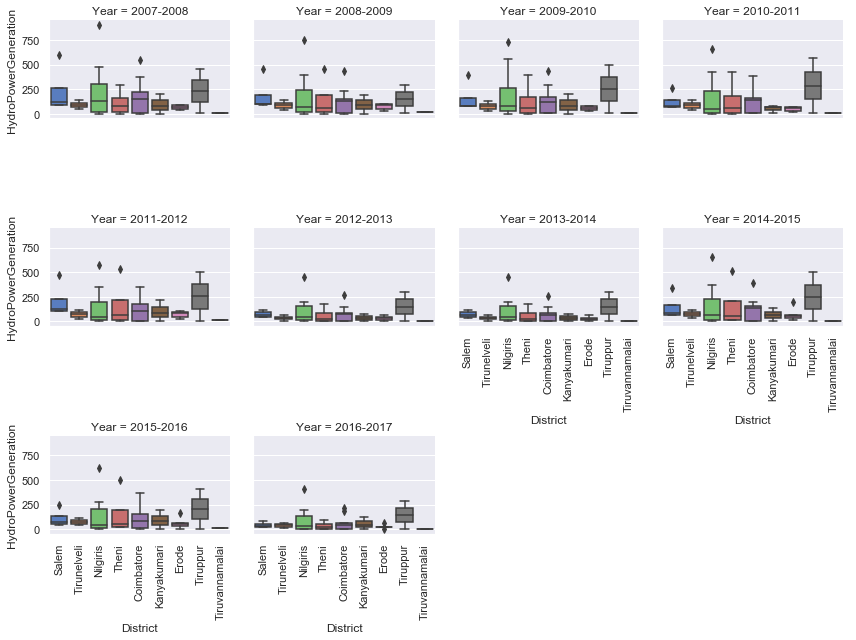

In [125]:
# Boxplot of Hydro power generation per district for every year
g = sns.FacetGrid(hpg_ic_yd_0, col='Year',col_wrap=4)
g.map(sns.boxplot,'District','HydroPowerGeneration',palette='muted')
g.set_xticklabels(rotation=90)

for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
    #ax.set(title="Box plot of HPG by district in 2007")
plt.tight_layout()
plt.show()

**_Line plots_**: here we have the various average trends of Hydro Power Generation produced for each district during the period

c:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` 

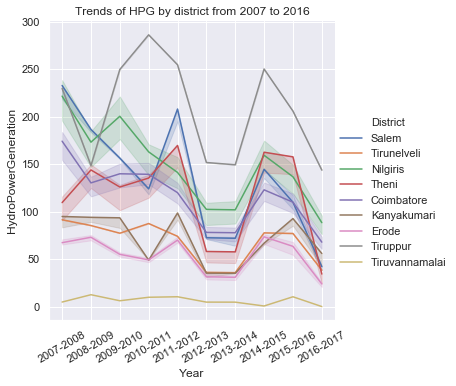

In [126]:

ax = sns.relplot(x="Year", y="HydroPowerGeneration", hue="District", kind="line", data=hpg_ic_yd_0, ci=20);
_ = ax.set(title="Trends of HPG by district from 2007 to 2016")
_ = ax.set_xticklabels(rotation=30)


### Q1: For each year which power house had the biggest/smallest hydro power generation ? (**Ans**: See the output. We note that Kunda 2 always had the biggest hydro power generation during the period with a peak in 2007 with 903.016 MU. Also, Perunchani and Lower Aliyar Power houses had a negative production in 2014 and 2016 respectively, they could instead be considered as consumers)

In [67]:
min_s = hpg_ic.iloc[:,3:14].describe().iloc[3,:]
max_s = hpg_ic.iloc[:,3:14].describe().iloc[7,:]
cols = hpg_ic.columns[3:14]
# a dictionnary with year as key and a list of the min and max for that year as value
min_max_dict = {cols[i]:[min_s[i],max_s[i]] for i in range(10)}

# outputing the result
list_min_max = [['year', 'minimum', 'Power_House_Min', 'maximum', 'Power_House_Max']]
for year, min_max in min_max_dict.items():
    power_house_min = hpg_ic.loc[hpg_ic[year]==min_max[0],'Name of Power House']
    power_house_max = hpg_ic.loc[hpg_ic[year]==min_max[1],'Name of Power House']
    row = [year, min_max[0], list(power_house_min)[0], min_max[1], list(power_house_max)[0]]
    list_min_max.append(row)
    #print(list(power_house_min)[0])
    #print(f'for the Year {year} the Power House with the bigest Hydro power generation was {list(power_house_max)[0]} with {min_max[1]} MU while the one with the smallest was {list(power_house_min)[0]} with {min_max[0]} MU')
print(tabulate(list_min_max))

---------  -------  ----------------------------------  -------  ---------------
year       minimum  Power_House_Min                     maximum  Power_House_Max
2007-2008  1.039    Periyar Vaigai Micro I, II and III  903.016  Kundah 2
2008-2009  0.189    Poonachi Micro                      753.07   Kundah 2
2009-2010  1.039    Periyar Vaigai Micro I, II and III  733.422  Kundah 2
2010-2011  1.039    Periyar Vaigai Micro I, II and III  655.977  Kundah 2
2011-2012  0.751    Maravakandi                         577.02   Kundah 2
2012-2013  0.064    Bhavanisagar RBC                    453.954  Kundah 2
2013-2014  0.057    Bhavanisagar RBC                    453.174  Kundah 2
2014-2015  -0.003   Perunchani                          652.903  Kundah 2
2015-2016  0.289    Mukuruthy Micro                     619.67   Kundah 2
2016-2017  -0.013   Lower Aliyar                        406.077  Kundah 2
---------  -------  ----------------------------------  -------  ---------------


In [68]:
# Aggregate hydro Power generation by district of production
agg_column = ['District']
summaries = {'2007-2008':'sum', '2008-2009':'sum','2009-2010':'sum',
'2010-2011':'sum','2011-2012':'sum','2012-2013':'sum','2013-2014':'sum',
'2014-2015':'sum','2015-2016':'sum','2016-2017':'sum'}
hpg_ic_bydistrict = hpg_ic.groupby(by=agg_column).agg(summaries).reset_index()
hpg_ic_bydistrict

,District,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
0,Coimbatore,1570.035,1175.019,1261.284,1256.369,1082.505,705.904,702.788,1109.133,992.262,613.862
1,Erode,338.162,366.630,276.776,247.607,351.765,158.758,156.051,368.979,318.862,121.262
2,Kanyakumari,285.685,282.960,281.422,147.713,296.659,106.663,106.259,201.275,279.071,168.795
3,Nilgiris,2218.454,1734.040,2006.740,1631.849,1415.663,1026.873,1022.070,1596.120,1370.150,887.196
4,Salem,932.279,747.290,626.744,496.967,833.127,291.277,289.064,579.677,440.663,169.973
5,Theni,439.130,576.659,504.797,542.660,679.845,233.508,231.932,651.296,631.813,138.540
6,Tirunelveli,183.537,171.390,155.243,175.618,148.698,72.852,72.187,155.918,154.670,77.571
7,Tiruppur,459.993,297.690,499.850,572.751,509.740,304.027,299.242,500.850,412.221,288.099
8,Tiruvannamalai,5.150,12.870,6.508,10.189,10.725,5.081,5.040,0.987,10.705,0.410


### Q2: For each year which district had the biggest/smallest hydro power generation ?(**Ans**: See the output. We note that Nilgiris district always had the biggest total hydro power generation during the period with a peak in 2007 reaching 2218.454 MU. Also, Tiruvannamalai district always had the lowest Hydro Power Production with the lowest realised in 2016 at 0.41 MU.)

In [69]:
min_s2 = hpg_ic_bydistrict.iloc[:,1:11].describe().iloc[3,:]
max_s2 = hpg_ic_bydistrict.iloc[:,1:11].describe().iloc[7,:]
cols2 = hpg_ic_bydistrict.columns[1:11]
# a dictionnary with year as key and a list of the min and max for that year as value
min_max_dict2 = {cols2[i]:[min_s2[i],max_s2[i]] for i in range(10)}

# outputing the result
list_min_max2 = [['year', 'minimum', 'District_Min', 'maximum', 'District_Max']]
for year, min_max in min_max_dict2.items():
    district_min = hpg_ic_bydistrict.loc[hpg_ic_bydistrict[year]==min_max[0],'District']
    district_max = hpg_ic_bydistrict.loc[hpg_ic_bydistrict[year]==min_max[1],'District']
    row = [year, min_max[0], list(district_min)[0], min_max[1], list(district_max)[0]]
    list_min_max2.append(row)
    #print(list(power_house_min)[0])
    #print(f'for the Year {year} the Power House with the bigest Hydro power generation was {list(power_house_max)[0]} with {min_max[1]} MU while the one with the smallest was {list(power_house_min)[0]} with {min_max[0]} MU')
print(tabulate(list_min_max2))

---------  -------  --------------  ------------------  ------------
year       minimum  District_Min    maximum             District_Max
2007-2008  5.15     Tiruvannamalai  2218.454            Nilgiris
2008-2009  12.87    Tiruvannamalai  1734.0400000000002  Nilgiris
2009-2010  6.508    Tiruvannamalai  2006.7399999999998  Nilgiris
2010-2011  10.189   Tiruvannamalai  1631.8490000000002  Nilgiris
2011-2012  10.725   Tiruvannamalai  1415.663            Nilgiris
2012-2013  5.081    Tiruvannamalai  1026.873            Nilgiris
2013-2014  5.04     Tiruvannamalai  1022.07             Nilgiris
2014-2015  0.987    Tiruvannamalai  1596.12             Nilgiris
2015-2016  10.705   Tiruvannamalai  1370.15             Nilgiris
2016-2017  0.41     Tiruvannamalai  887.1959999999999   Nilgiris
---------  -------  --------------  ------------------  ------------


In [70]:
# Aggregate hydro Power generation by year of operation
agg_column = ['Year of Operation']
summaries = {'2007-2008':'sum', '2008-2009':'sum','2009-2010':'sum',
'2010-2011':'sum','2011-2012':'sum','2012-2013':'sum','2013-2014':'sum',
'2014-2015':'sum','2015-2016':'sum','2016-2017':'sum'}
hpg_ic_byYoO = hpg_ic.groupby(by=agg_column).agg(summaries).reset_index()
hpg_ic_byYoO

,Year of Operation,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
0,1946-01-01,151.845,90.250,82.260,94.637,153.204,83.313,83.051,106.742,92.138,44.162
1,1951-01-01,136.371,136.880,129.196,136.778,121.599,63.248,62.641,117.374,115.745,65.709
2,1953-01-01,179.514,131.790,210.967,154.911,131.116,78.017,77.468,144.185,115.642,48.973
3,1954-01-01,159.118,59.660,63.921,28.661,39.188,39.617,39.270,38.452,56.153,12.498
4,1964-01-01,1249.087,1037.170,1011.440,911.069,794.471,635.250,633.763,910.194,849.315,562.887
5,1965-01-01,290.242,451.960,394.754,428.739,533.254,179.084,177.928,515.721,503.076,93.091
6,1966-01-01,745.809,581.250,509.708,400.166,580.185,203.922,203.359,469.328,324.977,143.538
7,1970-01-01,183.201,152.220,165.692,162.921,173.908,76.680,76.231,153.842,152.409,61.221
8,1971-01-01,723.087,581.140,629.647,557.206,573.653,308.394,307.461,462.099,541.009,395.191
9,1978-01-01,773.158,575.100,602.626,524.763,504.481,335.569,333.667,544.758,481.498,260.591


In [71]:
# transpose the hpg_ic dataframe

hpg_ic_time_serie = hpg_ic.set_index('Name of Power House').drop(columns=[ 'District', 'Year of Operation'], axis=1).transpose(copy=True)
hpg_ic_time_serie = hpg_ic_time_serie.reset_index(drop=True)

# create a year column and convert it to datetime
hpg_ic_time_serie['year'] = range(2007,2017,1)

hpg_ic_time_serie['year'] = pd.to_datetime(hpg_ic_time_serie['year'], format='%Y')
hpg_ic_time_serie.set_index('year')

Name of Power House,Mettur Dam,Papanasam,Moyar,Pykara Power,Kundah 1,Kundah 2,Periyar,Sakarapathy,Mettur Tunnel,Aliyar,...,Sathanur Micro,Thirumoorthi Micro,Mukuruthy Micro,Parsons,Lower Aliyar,PUSHEP,Bhavani Kattalai PH-1,Amaravathy,Perunchani,"Periyar Vaigai Micro I, II and III"
year,,,,,,,,,,,,,,,,,,,,,
2007-01-01,151.845,136.371,179.514,159.118,346.071,903.016,290.242,153.402,592.407,183.201,...,5.150,6.065,1.884,53.040,10.766,471.268,90.947,9.456,1.149,1.039
2008-01-01,90.250,136.880,131.790,59.660,284.100,753.070,451.960,128.630,452.620,152.220,...,12.870,5.920,1.680,40.980,10.910,388.840,98.410,7.340,2.450,1.039
2009-01-01,82.260,129.196,210.967,63.921,278.018,733.422,394.754,121.080,388.628,165.692,...,6.508,3.131,2.177,65.136,7.779,557.302,74.496,10.164,2.342,1.039
2010-01-01,94.637,136.778,154.911,28.661,255.092,655.977,428.739,134.795,265.371,162.921,...,10.189,3.799,1.443,39.180,8.533,428.720,71.225,8.691,2.677,1.039
2011-01-01,153.204,121.599,131.116,39.188,217.451,577.020,533.254,109.459,470.726,173.908,...,10.725,3.208,1.478,35.704,8.638,354.187,97.150,6.648,0.933,7.867
2012-01-01,83.313,63.248,78.017,39.617,181.296,453.954,179.084,83.680,120.242,76.680,...,5.081,1.964,1.147,30.172,4.022,195.094,70.915,2.282,0.244,1.862
2013-01-01,83.051,62.641,77.468,39.270,180.589,453.174,177.928,83.589,119.770,76.231,...,5.040,1.938,1.120,30.012,3.975,193.409,70.139,2.225,0.237,1.807
2014-01-01,106.742,117.374,144.185,38.452,257.291,652.903,515.721,134.139,335.189,153.842,...,0.987,1.721,1.825,34.656,6.238,365.832,193.486,6.104,-0.003,17.225
2015-01-01,92.138,115.745,115.642,56.153,229.645,619.670,503.076,79.113,245.864,152.409,...,10.705,1.163,0.289,25.498,8.005,279.237,164.438,4.845,1.255,18.767


In [79]:
# transpose the hpg_ic_byDistrict dataframe

hpg_ic_bydistrict_time_serie = hpg_ic_bydistrict.set_index('District').transpose(copy=True)
hpg_ic_bydistrict_time_serie = hpg_ic_bydistrict_time_serie.reset_index(drop=True)

# create a year column and convert it to datetime
hpg_ic_bydistrict_time_serie['year'] = range(2007,2017,1)

hpg_ic_bydistrict_time_serie['year'] = pd.to_datetime(hpg_ic_bydistrict_time_serie['year'], format='%Y')
hpg_ic_bydistrict_time_serie.set_index('year')

District,Coimbatore,Erode,Kanyakumari,Nilgiris,Salem,Theni,Tirunelveli,Tiruppur,Tiruvannamalai
year,,,,,,,,,
2007-01-01,1570.035,338.162,285.685,2218.454,932.279,439.130,183.537,459.993,5.150
2008-01-01,1175.019,366.630,282.960,1734.040,747.290,576.659,171.390,297.690,12.870
2009-01-01,1261.284,276.776,281.422,2006.740,626.744,504.797,155.243,499.850,6.508
2010-01-01,1256.369,247.607,147.713,1631.849,496.967,542.660,175.618,572.751,10.189
2011-01-01,1082.505,351.765,296.659,1415.663,833.127,679.845,148.698,509.740,10.725
2012-01-01,705.904,158.758,106.663,1026.873,291.277,233.508,72.852,304.027,5.081
2013-01-01,702.788,156.051,106.259,1022.070,289.064,231.932,72.187,299.242,5.040
2014-01-01,1109.133,368.979,201.275,1596.120,579.677,651.296,155.918,500.850,0.987
2015-01-01,992.262,318.862,279.071,1370.150,440.663,631.813,154.670,412.221,10.705


In [129]:
value_vars = hpg_ic_bydistrict_time_serie.columns[:-1].to_list()
hpg_ic_yd = pd.melt(hpg_ic_bydistrict_time_serie, id_vars=['year'], value_vars= value_vars,
 var_name='district', value_name='hydroPowerGeneration')

**_LIneplots_** : From the graph below, Nilgris is actually the District with the highest total production all over the period.
 Another observation is that almost in all the districts the production of Hydro Power Energy reduces with time. 
 This could perhaps be explained by the introduction of other type of Enegy in the country

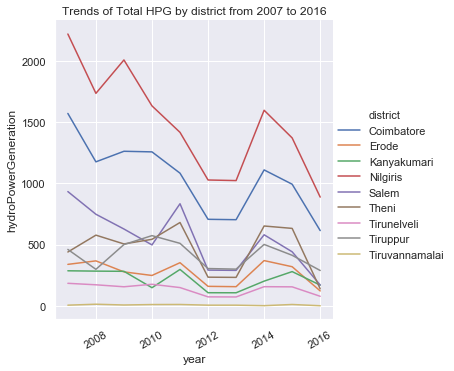

In [127]:
ax = sns.relplot(x="year", y="hydroPowerGeneration", hue="district", kind="line", data=hpg_ic_yd);
ax.set_xticklabels(rotation=30)
ax.set(title="Trends of Total HPG by district from 2007 to 2016")

In [130]:
# transforming the year column before ploting histograms
hpg_ic_yd['year'] = hpg_ic_yd['year'].apply(lambda x: x.to_pydatetime().year)

c:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


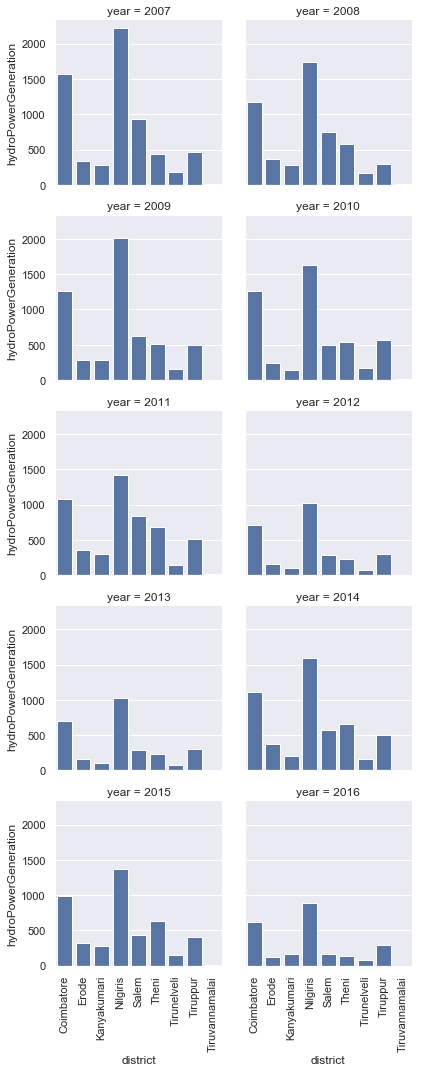

In [114]:
# Boxplot of Hydro power generation per district for every year
order_ = ['Coimbatore', 'Erode', 'Kanyakumari', 'Nilgiris', 'Salem', 'Theni', 'Tirunelveli', 'Tiruppur', 'Tiruvannamalai']
g1 = sns.FacetGrid(hpg_ic_yd, col='year',col_wrap=2 , palette="ch:r=-.5,l=.75")                                          
g1.map(sns.barplot ,'district','hydroPowerGeneration')
g1.set_xticklabels(rotation=90)

for ax in g1.axes.flatten(): 
    ax.tick_params(labelbottom=True)
    #ax.set(title="Box plot of HPG by district in 2007")
plt.tight_layout()
plt.show()